## Business Understanding

Airbnb is a community-based online platform for listing and renting local homes. It connects hosts and travelers and facilitates the process of renting without owning any rooms itself. It cultivates a sharing-economy by allowing property owners to rent out private flats.

Since 2008, Airbnb has helped guests and hosts to travel in a more unique, personalized way. The company went from a single air mattress for rent to global cooperation valued at more than 30 billion dollars all thanks to its energetic founder- Brian Chesky.

Sentiment analysis is extremely important because it helps businesses quickly understand the overall opinions of their customers. By automatically sorting the sentiment behind reviews, businesses can gauge brand reputation, understand customers and make faster and more accurate decisions.

Reviews are extremely important on Airbnb as customers are generally wary of airbnbs with bad ratings, while good reviews will increase the number of bookings you get as a host.This study will build from the data to identify a set of broad themes that characterise the attributes that influence Airbnb users’ experience in New York City.

### Problem Statement

When choosing an Airbnb, apart from the obvious requirements (price, location, and amenities), customers tend to spend time reading through guest reviews to understand more about the host and the experience they can expect while staying there. The only problem is that this manual effort can be very time consuming.

The problem is how can guests get a concise understanding of prior guests experience without having to read through pages of reviews? Customers are not only interested in knowing whether most reviews were positive they are also interested in knowing what most guests have said about their experience.
With this problem framed, the study aims to approach the problem by relevant keyword extraction using TF-IDF (Term Frequency — Inverse Document Frequency) and Text Summarisation.


### Purpose of the Study

General Objective:

To analyze customer airbnb reviews in New York City

Specific Objective:

.To identify accommodation attributes Airbnb guests use to rate their experience

.To extract sentiments from unstructured customer review texts.

.To build a word cloud with key word attributes customers use in their reviews.



### Business Success Criteria

Identify text polarity in the reviews, that is, classify it as positive, negative, or neutral. Eg being able to classify statements such as (“We stayed at this property for five days” as neutral, “I liked staying here” as positive, and “I disliked the stay” as negative.

Produce snapshots (wordcloud) of feedback for airbnbs to allow travelers to compare different options at a glance and make the best choice in no time.

Reccommend solutions that can benefit hoteliers, online travel agencies, booking sites, metasearch and travel review platforms seeking ways to put their customers in more relaxed mood.

In [61]:
#import necessary liibraries
import re
import nltk
import string
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.probability import FreqDist
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from textblob import TextBlob
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Data Understanding

In [2]:
#load data
seattle = pd.read_csv('reviews.csv')
seattle 

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [3]:
seattle .shape

(84849, 6)

In [4]:
seattle.duplicated().sum()

0

In [5]:
seattle.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [6]:
seattle = seattle.dropna()

In [7]:
seattle['listing_id'].value_counts()

208356     474
365550     466
25002      404
47196      353
63308      320
          ... 
5992645      1
9465815      1
2875975      1
7873208      1
6808970      1
Name: listing_id, Length: 3191, dtype: int64

In [8]:
df = seattle[['listing_id', 'comments']]
df

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...
...,...,...
84844,3624990,The description and pictures of the apartment ...
84845,3624990,We had an excellent stay. It was clean and com...
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,"Very good apartement, clean and well sized. Si..."


In [62]:
##Sampling
df = df.sample(n=20000, replace=False,random_state=142, axis=0)
df

,listing_id,tokenized,review
4441,3479241,"[kalia, great, host, roommate, gone, unfortuna...",1
40189,23430,"[unfortunately, able, travel, seattle, last, m...",1
10919,3269390,"[dianes, queen, anne, cottage, nice, made, ret...",1
37328,706385,"[wonderful, day, stay, sky, cabin, warm, refug...",1
63730,2130652,"[amber, perfect, place, us, trip, seattle, gil...",1
...,...,...,...
22350,5259194,"[perfect, stay, louie, kevin, deeply, kind, we...",1
40710,2809796,"[wonderful, host, quick, response, amenable, c...",1
22971,7363701,"[host, canceled, reservation, days, arrival, a...",1
70960,2520890,"[pretty, late, evening, knocked, amies, house,...",1


In [10]:
# copy = df.copy()
# copy

In [11]:
df['listing_id'].value_counts()

208356     123
365550     107
25002      106
47196       88
63308       88
          ... 
4642956      1
8741711      1
9712716      1
5538874      1
7093910      1
Name: listing_id, Length: 2574, dtype: int64

## Data Cleaning

In [12]:
df['lower']= df['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,listing_id,comments,lower
53802,1377812,We love their house and location! Amazing plac...,we love their house and location! amazing plac...
58988,4118282,"Good accommodations, nice place, would rent ag...","good accommodations, nice place, would rent ag..."
3002,741699,Matt's Place was perfect! I had a friend in t...,matt's place was perfect! i had a friend in to...
57932,1599856,"The listing was very accurate, the house was 2...","the listing was very accurate, the house was 2..."
80713,224763,Autumn was very personable. The place was very...,autumn was very personable. the place was very...
...,...,...,...
16735,4340838,We really enjoyed staying at Brian and Kylies ...,we really enjoyed staying at brian and kylies ...
5648,5242712,The place was in the perfect location in Capit...,the place was in the perfect location in capit...
65562,3977450,I spent a nice time with Carol and other guest...,i spent a nice time with carol and other guest...
28365,2737038,Our stay was great. Johnny is a good host kept...,our stay was great. johnny is a good host kept...


In [13]:
df['lower'] = df['lower'].apply(lambda x: ''.join(re.findall(r'[a-zA-Z+" "]',x)))
df

,listing_id,comments,lower
53802,1377812,We love their house and location! Amazing plac...,we love their house and location amazing place...
58988,4118282,"Good accommodations, nice place, would rent ag...",good accommodations nice place would rent again
3002,741699,Matt's Place was perfect! I had a friend in t...,matts place was perfect i had a friend in town...
57932,1599856,"The listing was very accurate, the house was 2...",the listing was very accurate the house was b...
80713,224763,Autumn was very personable. The place was very...,autumn was very personable the place was very ...
...,...,...,...
16735,4340838,We really enjoyed staying at Brian and Kylies ...,we really enjoyed staying at brian and kylies ...
5648,5242712,The place was in the perfect location in Capit...,the place was in the perfect location in capit...
65562,3977450,I spent a nice time with Carol and other guest...,i spent a nice time with carol and other guest...
28365,2737038,Our stay was great. Johnny is a good host kept...,our stay was great johnny is a good host kept ...


In [14]:
data_copy = df[['listing_id','lower']]
data_copy

,listing_id,lower
53802,1377812,we love their house and location amazing place...
58988,4118282,good accommodations nice place would rent again
3002,741699,matts place was perfect i had a friend in town...
57932,1599856,the listing was very accurate the house was b...
80713,224763,autumn was very personable the place was very ...
...,...,...
16735,4340838,we really enjoyed staying at brian and kylies ...
5648,5242712,the place was in the perfect location in capit...
65562,3977450,i spent a nice time with carol and other guest...
28365,2737038,our stay was great johnny is a good host kept ...


In [15]:
punc = string.punctuation
stp_words = stopwords.words('english')
stp_words += punc
stp_words += ['!','-']

df['punc'] = df['lower'].apply(lambda x: " ".join(word for  word in x.split() if word not in stp_words))
df

,listing_id,comments,lower,punc
53802,1377812,We love their house and location! Amazing plac...,we love their house and location amazing place...,love house location amazing place john complet...
58988,4118282,"Good accommodations, nice place, would rent ag...",good accommodations nice place would rent again,good accommodations nice place would rent
3002,741699,Matt's Place was perfect! I had a friend in t...,matts place was perfect i had a friend in town...,matts place perfect friend town visiting weeke...
57932,1599856,"The listing was very accurate, the house was 2...",the listing was very accurate the house was b...,listing accurate house blocks away restaurants...
80713,224763,Autumn was very personable. The place was very...,autumn was very personable the place was very ...,autumn personable place nice cozy especially l...
...,...,...,...,...
16735,4340838,We really enjoyed staying at Brian and Kylies ...,we really enjoyed staying at brian and kylies ...,really enjoyed staying brian kylies place stud...
5648,5242712,The place was in the perfect location in Capit...,the place was in the perfect location in capit...,place perfect location capitol hill pictures r...
65562,3977450,I spent a nice time with Carol and other guest...,i spent a nice time with carol and other guest...,spent nice time carol guests seattle responsib...
28365,2737038,Our stay was great. Johnny is a good host kept...,our stay was great johnny is a good host kept ...,stay great johnny good host kept great communi...


In [16]:
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['punc']), axis=1)
df

,listing_id,comments,lower,punc,tokenized
53802,1377812,We love their house and location! Amazing plac...,we love their house and location amazing place...,love house location amazing place john complet...,"[love, house, location, amazing, place, john, ..."
58988,4118282,"Good accommodations, nice place, would rent ag...",good accommodations nice place would rent again,good accommodations nice place would rent,"[good, accommodations, nice, place, would, rent]"
3002,741699,Matt's Place was perfect! I had a friend in t...,matts place was perfect i had a friend in town...,matts place perfect friend town visiting weeke...,"[matts, place, perfect, friend, town, visiting..."
57932,1599856,"The listing was very accurate, the house was 2...",the listing was very accurate the house was b...,listing accurate house blocks away restaurants...,"[listing, accurate, house, blocks, away, resta..."
80713,224763,Autumn was very personable. The place was very...,autumn was very personable the place was very ...,autumn personable place nice cozy especially l...,"[autumn, personable, place, nice, cozy, especi..."
...,...,...,...,...,...
16735,4340838,We really enjoyed staying at Brian and Kylies ...,we really enjoyed staying at brian and kylies ...,really enjoyed staying brian kylies place stud...,"[really, enjoyed, staying, brian, kylies, plac..."
5648,5242712,The place was in the perfect location in Capit...,the place was in the perfect location in capit...,place perfect location capitol hill pictures r...,"[place, perfect, location, capitol, hill, pict..."
65562,3977450,I spent a nice time with Carol and other guest...,i spent a nice time with carol and other guest...,spent nice time carol guests seattle responsib...,"[spent, nice, time, carol, guests, seattle, re..."
28365,2737038,Our stay was great. Johnny is a good host kept...,our stay was great johnny is a good host kept ...,stay great johnny good host kept great communi...,"[stay, great, johnny, good, host, kept, great,..."


In [17]:
df['tokenized'] 

53802    [love, house, location, amazing, place, john, ...
58988     [good, accommodations, nice, place, would, rent]
3002     [matts, place, perfect, friend, town, visiting...
57932    [listing, accurate, house, blocks, away, resta...
80713    [autumn, personable, place, nice, cozy, especi...
                               ...                        
16735    [really, enjoyed, staying, brian, kylies, plac...
5648     [place, perfect, location, capitol, hill, pict...
65562    [spent, nice, time, carol, guests, seattle, re...
28365    [stay, great, johnny, good, host, kept, great,...
66698    [perfect, location, us, vibrant, area, close, ...
Name: tokenized, Length: 20000, dtype: object

### Sentiment Analysis

We will add sentiment analysis features since customers reviews are highly linked to how they felt about their stay at the hotel. 
We use Vader, which is a part of the NLTK module designed for sentiment analysis. 
Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:

a neutrality score

a positivity score

a negativity score

an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [18]:
sia = SentimentIntensityAnalyzer()
df['neg'] = df['punc'].apply(lambda x:sia.polarity_scores(x)['neg'])
df['neu'] = df['punc'].apply(lambda x: sia.polarity_scores(x)['neu'])
df['pos'] = df['punc'].apply(lambda x:sia.polarity_scores(x)['pos'])
df['compound'] = df['punc'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [19]:
df.head(30)

,listing_id,comments,lower,punc,tokenized,neg,neu,pos,compound
53802,1377812,We love their house and location! Amazing plac...,we love their house and location amazing place...,love house location amazing place john complet...,"[love, house, location, amazing, place, john, ...",0.000,0.304,0.696,0.9747
58988,4118282,"Good accommodations, nice place, would rent ag...",good accommodations nice place would rent again,good accommodations nice place would rent,"[good, accommodations, nice, place, would, rent]",0.000,0.412,0.588,0.6908
3002,741699,Matt's Place was perfect! I had a friend in t...,matts place was perfect i had a friend in town...,matts place perfect friend town visiting weeke...,"[matts, place, perfect, friend, town, visiting...",0.000,0.438,0.562,0.9612
57932,1599856,"The listing was very accurate, the house was 2...",the listing was very accurate the house was b...,listing accurate house blocks away restaurants...,"[listing, accurate, house, blocks, away, resta...",0.112,0.453,0.434,0.9260
80713,224763,Autumn was very personable. The place was very...,autumn was very personable the place was very ...,autumn personable place nice cozy especially l...,"[autumn, personable, place, nice, cozy, especi...",0.000,0.534,0.466,0.7902
78543,6400000,"Amazing accomodation, amazing neighborhood. Ma...",amazing accomodation amazing neighborhood mark...,amazing accomodation amazing neighborhood mark...,"[amazing, accomodation, amazing, neighborhood,...",0.000,0.591,0.409,0.8658
75846,4211081,"Peter was very attentive and helpful, replied ...",peter was very attentive and helpful replied t...,peter attentive helpful replied questions matt...,"[peter, attentive, helpful, replied, questions...",0.000,0.333,0.667,0.9584
84044,442487,A very convenient location for all our activit...,a very convenient location for all our activit...,convenient location activities seattle quiet s...,"[convenient, location, activities, seattle, qu...",0.098,0.616,0.286,0.6369
34141,796594,My husband and I wanted to mix in some local f...,my husband and i wanted to mix in some local f...,husband wanted mix local flavor amidst tourist...,"[husband, wanted, mix, local, flavor, amidst, ...",0.000,0.598,0.402,0.9781
19168,611509,Joanna is a wonderfully bright and aware host....,joanna is a wonderfully bright and aware host ...,joanna wonderfully bright aware host good info...,"[joanna, wonderfully, bright, aware, host, goo...",0.000,0.369,0.631,0.9855


In [20]:
df['review'] = df['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df

,listing_id,comments,lower,punc,tokenized,neg,neu,pos,compound,review
53802,1377812,We love their house and location! Amazing plac...,we love their house and location amazing place...,love house location amazing place john complet...,"[love, house, location, amazing, place, john, ...",0.000,0.304,0.696,0.9747,positive
58988,4118282,"Good accommodations, nice place, would rent ag...",good accommodations nice place would rent again,good accommodations nice place would rent,"[good, accommodations, nice, place, would, rent]",0.000,0.412,0.588,0.6908,positive
3002,741699,Matt's Place was perfect! I had a friend in t...,matts place was perfect i had a friend in town...,matts place perfect friend town visiting weeke...,"[matts, place, perfect, friend, town, visiting...",0.000,0.438,0.562,0.9612,positive
57932,1599856,"The listing was very accurate, the house was 2...",the listing was very accurate the house was b...,listing accurate house blocks away restaurants...,"[listing, accurate, house, blocks, away, resta...",0.112,0.453,0.434,0.9260,positive
80713,224763,Autumn was very personable. The place was very...,autumn was very personable the place was very ...,autumn personable place nice cozy especially l...,"[autumn, personable, place, nice, cozy, especi...",0.000,0.534,0.466,0.7902,positive
...,...,...,...,...,...,...,...,...,...,...
16735,4340838,We really enjoyed staying at Brian and Kylies ...,we really enjoyed staying at brian and kylies ...,really enjoyed staying brian kylies place stud...,"[really, enjoyed, staying, brian, kylies, plac...",0.000,0.587,0.413,0.9583,positive
5648,5242712,The place was in the perfect location in Capit...,the place was in the perfect location in capit...,place perfect location capitol hill pictures r...,"[place, perfect, location, capitol, hill, pict...",0.184,0.486,0.330,0.6355,positive
65562,3977450,I spent a nice time with Carol and other guest...,i spent a nice time with carol and other guest...,spent nice time carol guests seattle responsib...,"[spent, nice, time, carol, guests, seattle, re...",0.000,0.507,0.493,0.9382,positive
28365,2737038,Our stay was great. Johnny is a good host kept...,our stay was great johnny is a good host kept ...,stay great johnny good host kept great communi...,"[stay, great, johnny, good, host, kept, great,...",0.000,0.273,0.727,0.9618,positive


In [21]:
df = df[['listing_id','tokenized', 'review']]
df

,listing_id,tokenized,review
53802,1377812,"[love, house, location, amazing, place, john, ...",positive
58988,4118282,"[good, accommodations, nice, place, would, rent]",positive
3002,741699,"[matts, place, perfect, friend, town, visiting...",positive
57932,1599856,"[listing, accurate, house, blocks, away, resta...",positive
80713,224763,"[autumn, personable, place, nice, cozy, especi...",positive
...,...,...,...
16735,4340838,"[really, enjoyed, staying, brian, kylies, plac...",positive
5648,5242712,"[place, perfect, location, capitol, hill, pict...",positive
65562,3977450,"[spent, nice, time, carol, guests, seattle, re...",positive
28365,2737038,"[stay, great, johnny, good, host, kept, great,...",positive


In [22]:
df['review'] = df['review'].map({'positive':1, 'negative':0})
df

,listing_id,tokenized,review
53802,1377812,"[love, house, location, amazing, place, john, ...",1
58988,4118282,"[good, accommodations, nice, place, would, rent]",1
3002,741699,"[matts, place, perfect, friend, town, visiting...",1
57932,1599856,"[listing, accurate, house, blocks, away, resta...",1
80713,224763,"[autumn, personable, place, nice, cozy, especi...",1
...,...,...,...
16735,4340838,"[really, enjoyed, staying, brian, kylies, plac...",1
5648,5242712,"[place, perfect, location, capitol, hill, pict...",1
65562,3977450,"[spent, nice, time, carol, guests, seattle, re...",1
28365,2737038,"[stay, great, johnny, good, host, kept, great,...",1


In [23]:
df[df['review']==0]

,listing_id,tokenized,review
18938,218741,"[first, airbnb, experience, dont, comparisons,...",0
73908,1950012,"[air, mystery, joe, none, entirely, pleasant, ...",0
9742,888967,"[listing, pictures, accurately, describe, home...",0
63597,3689416,"[thought, place, private, appt, untill, arrive...",0
32959,3487824,"[schne, unterkunft, mit, vielen, extras, zb, d...",0
...,...,...,...
8880,8065531,"[aaron, war, hilfsbereit, freundlich, und, hat...",0
50384,692671,"[everything, advertised, sun, shy, cat]",0
30876,103466,"[location, accurately, described, compelling, ...",0
38748,938785,"[apartment, terrific, neighborhood, arrived, m...",0


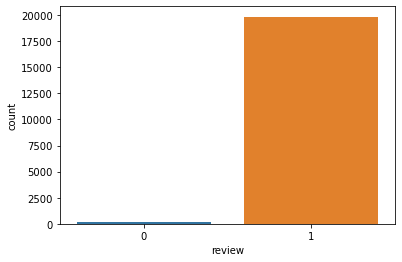

In [24]:
sns.countplot(df['review']);

In [25]:
frequent_words = []
for message in df['tokenized']:
    frequent_words.extend([word for word in message if len(word)> 5 ])
len(frequent_words)

347314

In [26]:
#lemmatization
wnl = WordNetLemmatizer()
lemmatized =[]
for lemma in frequent_words:
    lemma = wnl.lemmatize(lemma)
    lemmatized.append(lemma)
len(lemmatized)
# frequent_words.apply(lambda x:" ".join(wnl.lemmatize(word) for word in frequent_words)

347314

In [60]:
## common words frequency
freq_dist = FreqDist(lemmatized)
top_40 = freq_dist.most_common(40)
top_40

[('seattle', 9534),
 ('location', 6802),
 ('apartment', 6167),
 ('comfortable', 5896),
 ('everything', 4668),
 ('neighborhood', 4507),
 ('recommend', 3865),
 ('perfect', 3823),
 ('really', 3740),
 ('downtown', 3661),
 ('definitely', 3633),
 ('restaurant', 2998),
 ('experience', 2929),
 ('wonderful', 2861),
 ('staying', 2663),
 ('needed', 2514),
 ('helpful', 2390),
 ('beautiful', 2318),
 ('walking', 2237),
 ('friendly', 2202),
 ('lovely', 2162),
 ('enjoyed', 2158),
 ('coffee', 2010),
 ('little', 1952),
 ('kitchen', 1949),
 ('around', 1938),
 ('highly', 1885),
 ('parking', 1799),
 ('welcoming', 1779),
 ('distance', 1774),
 ('minute', 1760),
 ('airbnb', 1757),
 ('stayed', 1707),
 ('thanks', 1701),
 ('bathroom', 1677),
 ('convenient', 1640),
 ('amazing', 1592),
 ('accommodating', 1584),
 ('located', 1532),
 ('street', 1443)]

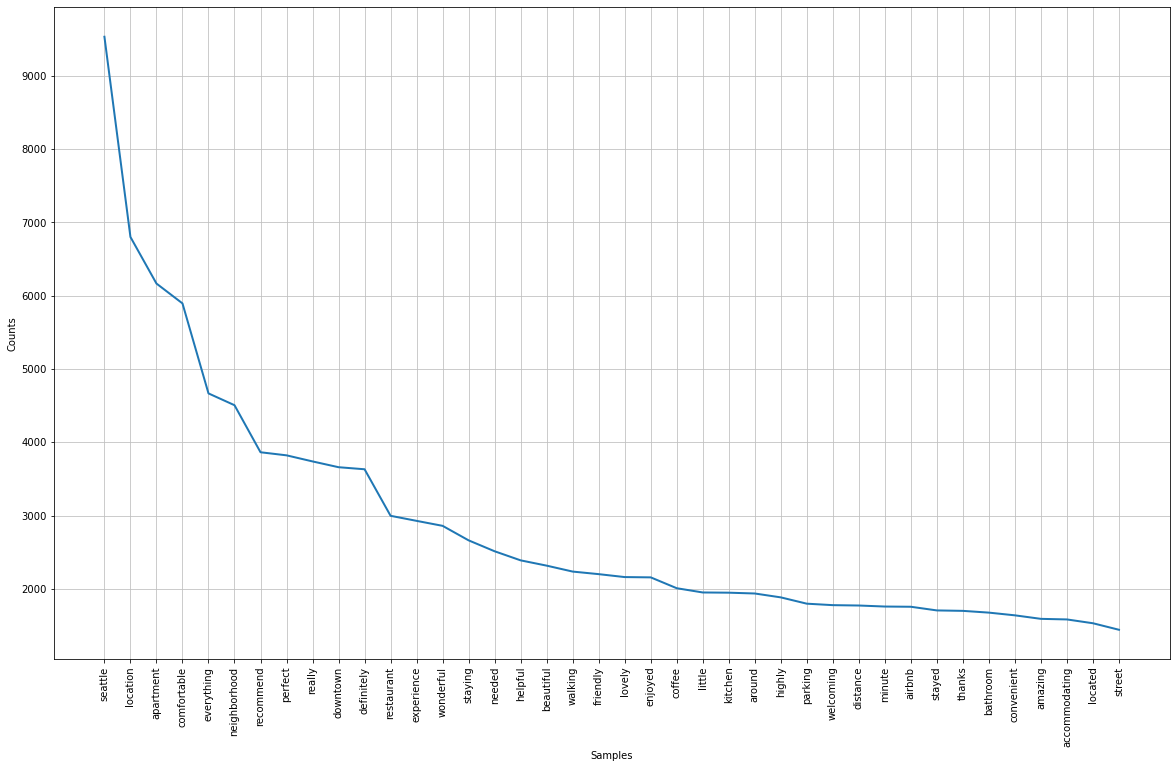

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
top_40  = FreqDist(dict(freq_dist.most_common()[0:40]))
plt.figure(figsize=(20,12))
top_40.plot()

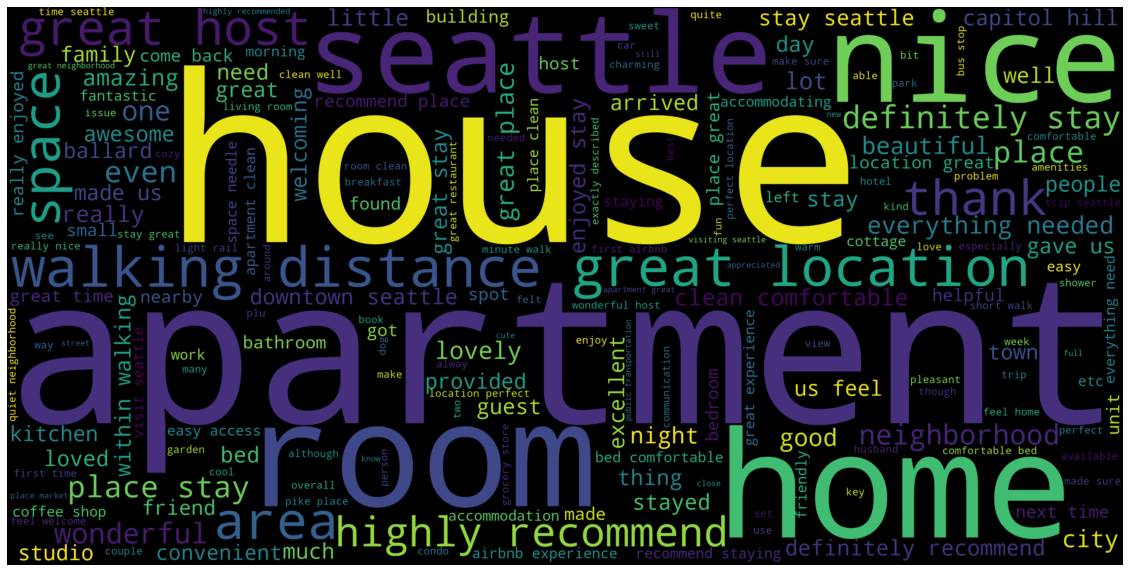

In [29]:
#wordcloud
words = []
for message in df['tokenized']:
    words.extend([word for word in message if word not in STOPWORDS])
plt.figure(figsize=(20,12))        
wordcloud = WordCloud(width = 3000, height = 1500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Making a prediction

In [30]:
# Write a review as one continuous string (multiple sentences are ok)
review = 'The bed is comfortable, bathroom and terrace are excellent. Location is incredible.'
# Obtain the sid scores for your review
print(sia.polarity_scores(review))

review2="""we locked ourselves in because we were scared to go to the living room,
this place is no go at all,can’t recommend this place to my enemies."""
# Obtain the sid scores for your review
print(sia.polarity_scores(review2))


{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}
{'neg': 0.246, 'neu': 0.68, 'pos': 0.074, 'compound': -0.7003}


In [32]:
to_concat = df[['listing_id','review']]
new_df = pd.merge(to_concat, data_copy)
new_df

,listing_id,review,lower
0,1377812,1,we love their house and location amazing place...
1,1377812,1,wonderful and helpful hosts beautiful home bes...
2,1377812,1,this place was amazing definitely worth the p...
3,1377812,1,we loved our stay over thanksgiving at john an...
4,1377812,1,great hosts and a stunning house loved the vie...
...,...,...,...
433605,4708075,1,catherine was a lovely host my friend and i en...
433606,299817,1,the reservation was canceled days before arri...
433607,3251016,1,desiree was very helpful and even stopped by t...
433608,8306581,1,this is a terrific apartment in one of seattle...


In [33]:
doc = list(new_df['lower'])[:10000]

In [63]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 10000) 
 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(doc)

In [67]:
X = tfidf_vectorizer_vectors.toarray()
Y = new_df['review'][:10000]

In [69]:
SEED=42

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [71]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))
print(classification_report(y_test, gnb.predict(X_test)))
confusion_matrix(y_test, gnb.predict(X_test))

Training Accuracy score: 0.8346
Testing Accuracy score: 0.834
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.99      0.84      0.91      1988

    accuracy                           0.83      2000
   macro avg       0.50      0.42      0.45      2000
weighted avg       0.99      0.83      0.90      2000



array([[   0,   12],
       [ 320, 1668]])

### Findings

Most customers have a great experience during the stay as most reviews were positive and most frequent words were also positive





### Areas of further study
. Explore dataset with balanced  reviews (positive and negative) to test the performance consistency of the Sentiment Analyzer